# Final Project Report
The objective of this project is to research and find out by data alone, which champions in League of Legends will be the easiest to pick up and win games.
<br>
 - Name: Byron Washington
 - Email: bwashin8@gmu.edu
 - G-number: 01236996

### Imported Packages

In [37]:
import matplotlib.pyplot as plt # plotting
import seaborn as sea # plotting
import pandas as pd # data processing

## Background
I play League of Legends a lot in my free time. I'd like to think that I've gotten relatively good at it too. Recently, my friends have gotten into it and the one question new players always ask is: "What character is good?". My immediate response to anyone new is always: "Pick anyone that looks cool to you and learn the game through them.". But I started to wonder which champions would be the easiest to pick up and get good with. So for this project, I found a dataset off of Kaggle and now I'm going to find the answer to that question.
<br>
<br>Disclaimer: This data was collected from patch 14.19 (09/24/2024) so some of the numbers might have changed. Regardless, the champions we choose at the end should still apply to the current patch.

Firstly, I want to find the easiest champion in the best role to win games. There's a few things that come into account.
- Win Rate
- Ban Rate
- Champion Difficulty
- Average KDA (Kills/Deaths/Assists)
- Role Win Rate
- Role Difficulty
- Resource Types

## Data Cleaning
When going through this data online, I found a lot of columns that I didn't need so I'm going to remove those and only keep the ones that are relevant.

In [38]:
# initializing
path = '../lol_champions.csv'
df = pd.read_csv(path, delimiter=';', encoding_errors='ignore')

df.drop(['blurb', 'title', 'ulti_description', 'spell1_description', 'spell2_description', 'spell3_description', 
         'ulti_name', 'spell1_name', 'spell2_name', 'spell3_name','ulti_cost', 'spell1_cost', 'spell2_cost', 'spell3_cost',
         'ulti_cooldown', 'spell1_cooldown', 'spell2_cooldown', 'spell3_cooldown', 'pentas/match', 'key', 'releasedate', 
         'attack', 'defense', 'magic', 'popularity_spot', 'id', 'tags', 'rangetype', 'hp', 'hpperlevel', 'mp', 'mpperlevel',
         'movespeed', 'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
         'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel', 'attackspeed', 'attackspeedperlevel', 'popularity'], axis='columns', inplace=True)
df.head()

,name,winrate,banrate,averageKDA,difficulty,role,partype
0,Aatrox,49.5%,17.3%,6.1/6.1/5.3,4.0,Top,Blood Well
1,Ahri,51.0%,4.4%,6.2/5.3/7.6,5.0,Middle,Mana
2,Akali,49.3%,9.3%,8.4/5.8/4.8,7.0,"Top,Middle",Energy
3,Akshan,48.6%,1.9%,8.5/6.5/5.5,7.0,Middle,Mana
4,Alistar,49.0%,2.0%,1.9/6.4/13.8,7.0,Support,Mana


I already know which rows are going to be problems because some champions don't use mana or energy.
<br>To fix this problem, I'll find those champions and assign their resource to 'health' or 'none'.

In [39]:
df.loc[~df['partype'].isin(['Mana', 'Energy'])]

,name,winrate,banrate,averageKDA,difficulty,role,partype
0,Aatrox,49.5%,17.3%,6.1/6.1/5.3,4.0,Top,Blood Well
14,Bel'veth,49.8%,4.2%,7.0/5.7/6.5,6.0,Jungle,none
18,Briar,50.6%,8.0%,8.4/7.7/7.4,6.0,Jungle,Fury
27,Dr. Mundo,48.8%,21.3%,8.5/7.0/5.5,5.0,Top,NaN
37,Garen,51.3%,15.4%,6.7/5.5/4.2,5.0,Top,NaN
38,Gnar,49.8%,0.8%,5.3/5.9/6.1,8.0,Top,Rage
59,Katarina,48.5%,7.0%,9.7/7.0/5.7,8.0,Middle,NaN
65,Kled,51.5%,0.9%,7.1/6.2/6.5,7.0,Top,Courage
83,Mordekaiser,51.9%,13.2%,3.3/6.3/12.7,4.0,Top,Shield
104,Rek'Sai,51.1%,0.7%,1.8/6.3/16.0,3.0,Jungle,Rage


From playing the game, I know that only four champs use health; the rest don't have any ability costs.
<br>I'm purposely not counting fury because those champions don't need it to cast their abilities; it only empowers them.

In [40]:
df.loc[df['name'].isin(['Briar', 'Dr. Mundo', 'Vladimir', 'Zac']), 'partype'] = 'Health'
df.loc[df['partype'].isin(['Health'])] # confirming the changes

,name,winrate,banrate,averageKDA,difficulty,role,partype
18,Briar,50.6%,8.0%,8.4/7.7/7.4,6.0,Jungle,Health
27,Dr. Mundo,48.8%,21.3%,8.5/7.0/5.5,5.0,Top,Health
151,Vladimir,48.9%,16.3%,6.1/6.2/6.2,7.0,"Middle,Top",Health
161,Zac,50.8%,2.9%,4.9/5.1/10.8,8.0,"Jungle,Top,Support",Health


Now we change all the remaining champions' resources to 'none'.

In [41]:
df.loc[~df['partype'].isin(['Mana', 'Energy', 'Health']), 'partype'] = 'None'
df.loc[~df['partype'].isin(['Mana', 'Energy', 'Health', 'None'])] # confirming the changes

,name,winrate,banrate,averageKDA,difficulty,role,partype


Now that the resource types are fixed, we can look for any null values.

In [42]:
df[df.isnull().any(axis='columns')]

,name,winrate,banrate,averageKDA,difficulty,role,partype
141,Udyr,51.9%,8.1%,7.0/6.0/4.9,NaN,"Top,Jungle",None


I'm guessing there's no data for Udyr either because the person who made this dataset forgot him, or the API itself wasn't updated after his somewhat recent rework.
<br>To solve this, I looked on the league client and saw they gave Udyr a difficulty of 2/3, so we'll put his difficulty at 7.

In [43]:
df.loc[141,'difficulty'] = 7
df.loc[141] # confirming changes

name                 Udyr
winrate             51.9%
banrate              8.1%
averageKDA    7.0/6.0/4.9
difficulty            7.0
role           Top,Jungle
partype              None
Name: 141, dtype: object

Now, for the champion's KDAs, instead of having their kills, deaths, and assists, it should be one ratio.
<br>To do this, we use the formula: (kills + assists)/deaths

In [44]:
def findKDA(row):
    parsedNums = row.split('/')
    parsedNums = [float(x) for x in parsedNums]
    return (parsedNums[0]+ parsedNums[2]) / parsedNums[1]
df['averageKDA'] = df['averageKDA'].apply(findKDA)
df.head()

,name,winrate,banrate,averageKDA,difficulty,role,partype
0,Aatrox,49.5%,17.3%,1.868852,4.0,Top,None
1,Ahri,51.0%,4.4%,2.603774,5.0,Middle,Mana
2,Akali,49.3%,9.3%,2.275862,7.0,"Top,Middle",Energy
3,Akshan,48.6%,1.9%,2.153846,7.0,Middle,Mana
4,Alistar,49.0%,2.0%,2.453125,7.0,Support,Mana


Instead of having each of their listed roles be in one string, it's easier if I just put their roles into an array.

In [45]:
df['role'] = df['role'].str.split(',')
df.head() # confirming the role changes

,name,winrate,banrate,averageKDA,difficulty,role,partype
0,Aatrox,49.5%,17.3%,1.868852,4.0,[Top],None
1,Ahri,51.0%,4.4%,2.603774,5.0,[Middle],Mana
2,Akali,49.3%,9.3%,2.275862,7.0,"[Top, Middle]",Energy
3,Akshan,48.6%,1.9%,2.153846,7.0,[Middle],Mana
4,Alistar,49.0%,2.0%,2.453125,7.0,[Support],Mana


All that's left to do is parse the winrates and banrates so they're seen as numerical data instead of categorical. This makes it easier to graph.

In [46]:
df['winrate'] = df['winrate'].str[:-1].astype(float).div(100)
df['banrate'] = df['banrate'].str[:-1].astype(float).div(100)
df.head()

,name,winrate,banrate,averageKDA,difficulty,role,partype
0,Aatrox,0.495,0.173,1.868852,4.0,[Top],None
1,Ahri,0.510,0.044,2.603774,5.0,[Middle],Mana
2,Akali,0.493,0.093,2.275862,7.0,"[Top, Middle]",Energy
3,Akshan,0.486,0.019,2.153846,7.0,[Middle],Mana
4,Alistar,0.490,0.020,2.453125,7.0,[Support],Mana


---

## Methods
Now that all the data is cleaned, we can start looking for the right champion.
<br>Going into this, I'm guessing we'll find that at least Amumu, Tahm Kench, or Galio will be in the top 3 because in playing the game, those champions seem to perform the best.
<br>
<br>First and foremost, let's take a broader look at the champion pool and find out which champions will perform the best based on their resource.

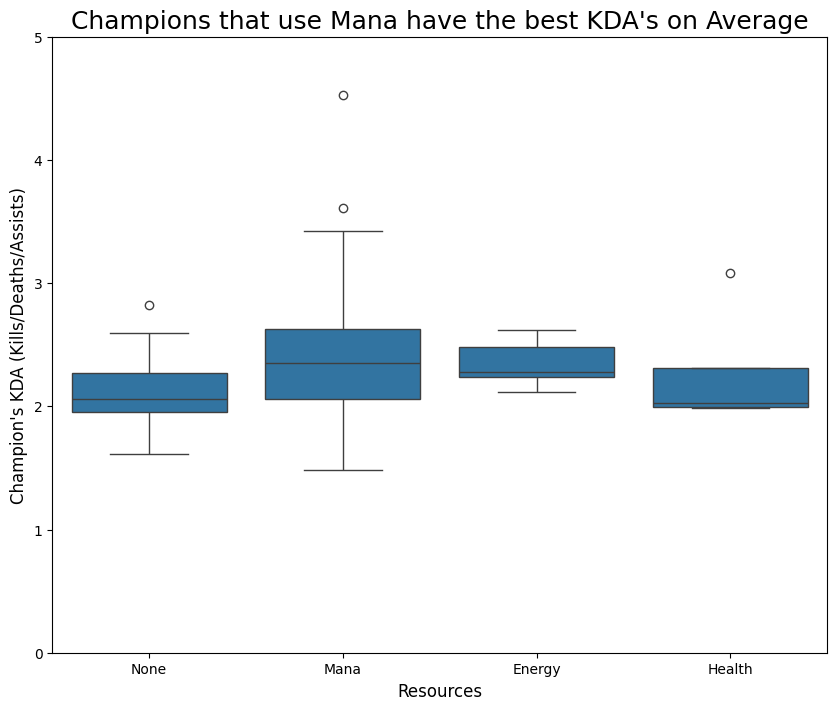

In [47]:
# creating a boxplot of kda vs resource type
plt.figure(figsize=(10,8))
sea.boxplot(data=df, x='partype', y ='averageKDA')
plt.title('Champions that use Mana have the best KDA\'s on Average', fontsize=18)
plt.xlabel('Resources', fontsize=12)
plt.ylabel('Champion\'s KDA (Kills/Deaths/Assists)', fontsize=12)
plt.ylim([0, 5])
plt.show()

Now that we know that a champion with mana will more likely give us the best KDA, we can now look at each of the different roles.
<br>To find a role, we'll compare the difficulties of each champion in their respective roles to find out which role has the easier champions.

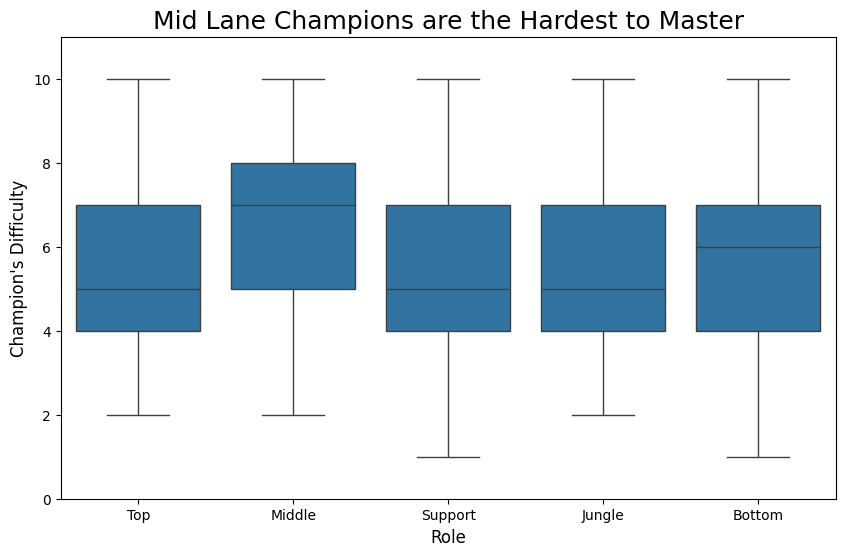

In [ ]:
# exploding the dataframe to allow champs to be in more than one role
df_role_exploded = df.explode('role')

# creating a boxplot difficulty vs role
plt.figure(figsize=(10,6))
sea.boxplot(data=df_role_exploded, x='role', y ='difficulty')
plt.title('Mid Lane Champions are the Hardest to Master', fontsize=18)
plt.xlabel('Role', fontsize=12)
plt.ylabel('Champion\'s Difficulty', fontsize=12)
plt.ylim([0,11])
plt.show()

From the looks of the chart, champs that play in mid lane are going to be harder.
<br>This shows us we should focus our attention on champions that can play support, jungle, top lane, and bot lane.
<br>
<br>Now that we know not to look for a mid lane champion, try to at least narrow our search to 3 roles by looking at each role's winrates.

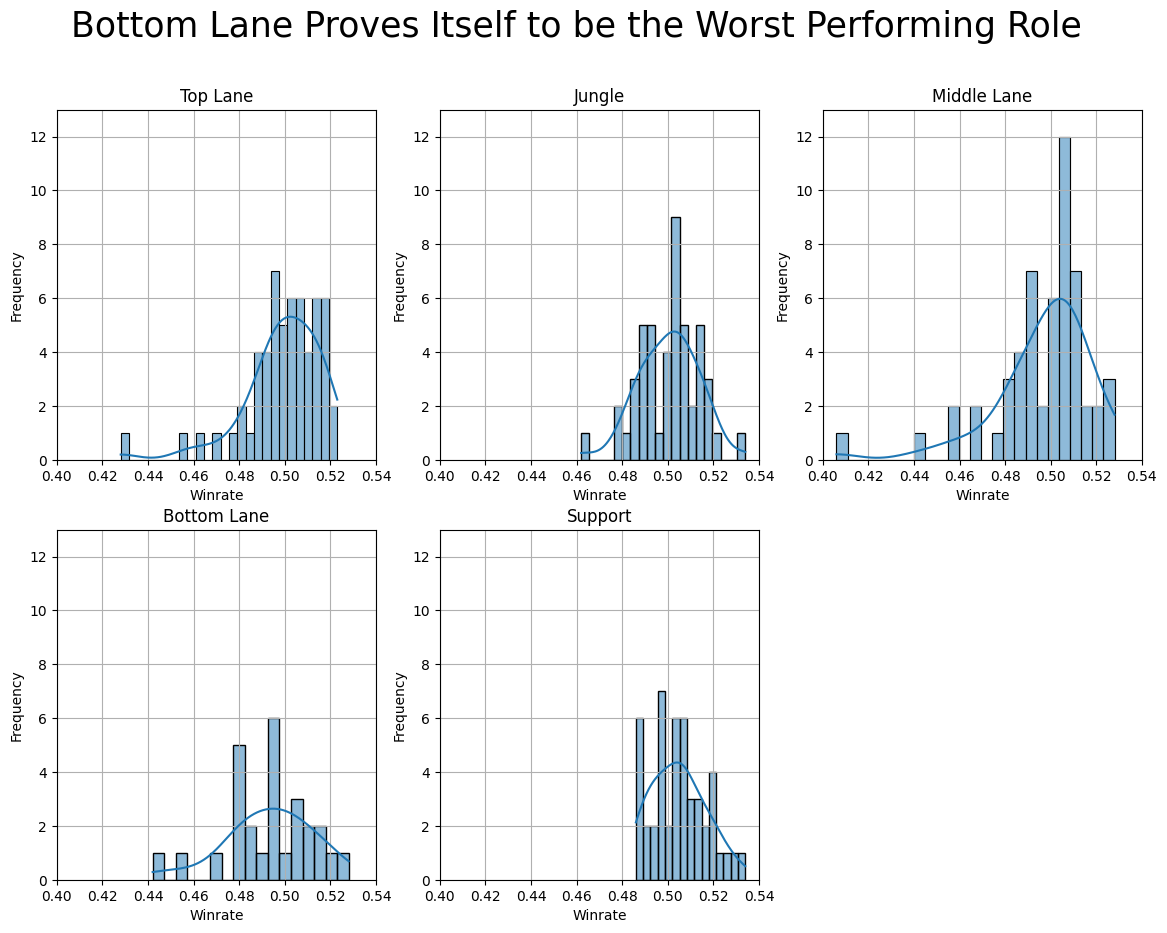

In [49]:
# creating separate dataframes for each role so we can test them individually
top_champs = df.loc[df['role'].apply(lambda row: 'Top' in row)]
jg_champs = df.loc[df['role'].apply(lambda row: 'Jungle' in row)]
mid_champs = df.loc[df['role'].apply(lambda row: 'Middle' in row)]
bot_champs = df.loc[df['role'].apply(lambda row: 'Bottom' in row)]
sup_champs = df.loc[df['role'].apply(lambda row: 'Support' in row)]

# creating a large figure with histograms for each role
plt.figure(figsize=[14,10])
plt.suptitle('Bottom Lane Proves Itself to be the Worst Performing Role ', fontsize=25)

# all bin counts are the same proportion of their dataset
plt.subplot(2, 3, 1)
sea.histplot(data=top_champs['winrate'], bins=26, kde=True)
plt.title('Top Lane')
plt.xlabel('Winrate')
plt.ylabel('Frequency')
plt.xlim(0.4, 0.54)
plt.ylim(0, 13)
plt.grid()

plt.subplot(2, 3, 2)
sea.histplot(data=jg_champs['winrate'], bins=20, kde=True)
plt.title('Jungle')
plt.xlabel('Winrate')
plt.ylabel('Frequency')
plt.xlim(0.4, 0.54)
plt.ylim(0, 13)
plt.grid()

plt.subplot(2, 3, 3)
sea.histplot(data=mid_champs['winrate'], bins=25, kde=True)
plt.title('Middle Lane')
plt.xlabel('Winrate')
plt.ylabel('Frequency')
plt.xlim(0.4, 0.54)
plt.ylim(0, 13)
plt.grid()

plt.subplot(2, 3, 4)
sea.histplot(data=bot_champs['winrate'], bins=17, kde=True)
plt.title('Bottom Lane')
plt.xlabel('Winrate')
plt.ylabel('Frequency')
plt.xlim(0.4, 0.54)
plt.ylim(0, 13)
plt.grid()

plt.subplot(2, 3, 5)
sea.histplot(data=sup_champs['winrate'], bins=15, kde=True)
plt.title('Support')
plt.xlabel('Winrate')
plt.ylabel('Frequency')
plt.xlim(0.4, 0.54)
plt.ylim(0, 13)
plt.grid()

plt.show()

This graph clearly shows that bot lane has the lowest winrates for its champions. Which helps us narrow down to support, top lane, or jungle.
<br>
<br>Now that we have 3 roles to choose from, let's look at each champion's winrate and banrate.
<br>This will help us find a champion that is currently winning a lot and isn't getting banned often.

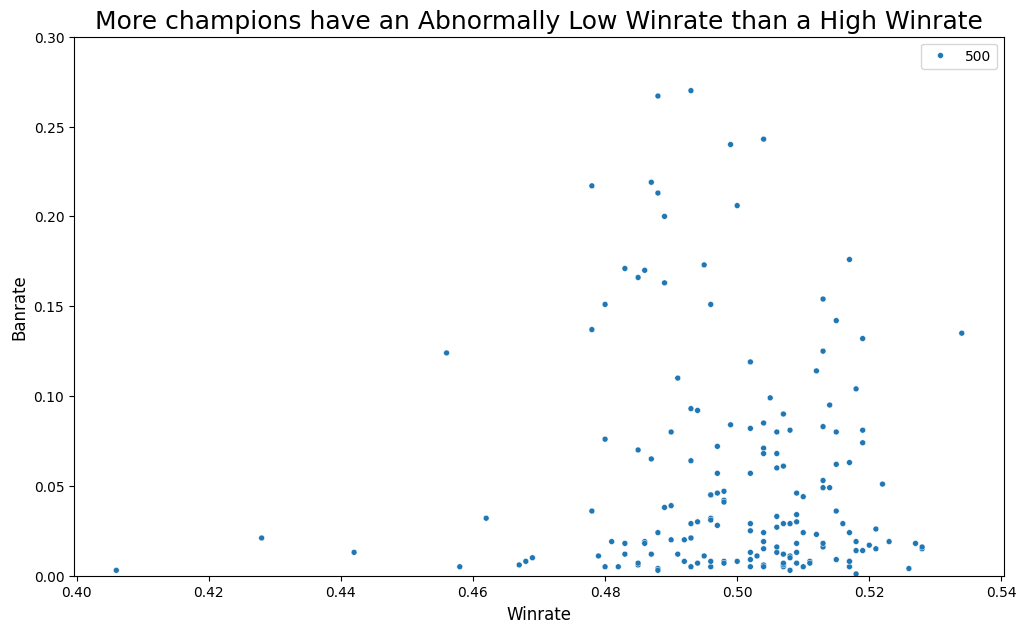

In [50]:
# creating a scatterplot of banrate vs winrate
plt.figure(figsize=[12,7])
winban_plot = sea.scatterplot(data=df, x='winrate', y='banrate', size=500)
plt.title('More champions have an Abnormally Low Winrate than a High Winrate', fontsize=18)
plt.xlabel('Winrate', fontsize=12)
plt.ylabel('Banrate', fontsize=12)
plt.ylim(0, 0.3)
plt.show()

There's a lot of data here, but we're looking for a handful of champions with high winrates and low banrates.
<br>We can find them by zooming in on our graph to see only the best of those two statistics.

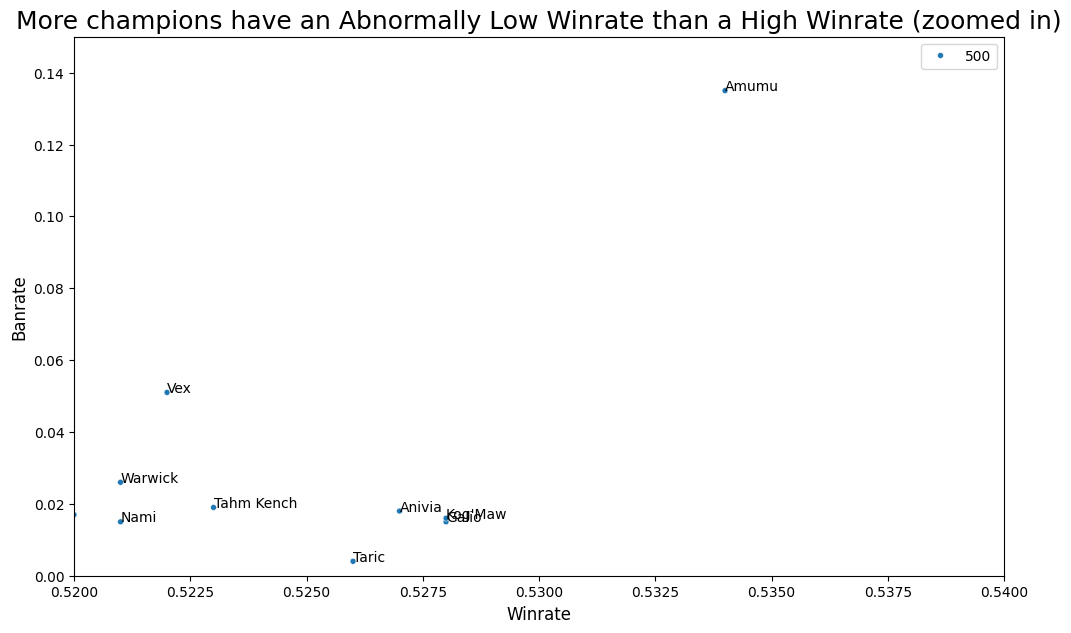

In [51]:
# zooming in on the previous figure
winban_plot.axis([0.52, 0.54, 0, 0.15])
winban_champs = []
for x,y,z in zip(df['winrate'], df['banrate'], df['name']):
    if x > 0.52 and y < 0.15:
        winban_plot.text(x, y, z, horizontalalignment='left', size='medium', color='black')
        winban_champs.append(z) # storing those champions for later
winban_plot.set_title('More champions have an Abnormally Low Winrate than a High Winrate (zoomed in)', fontsize=18)
winban_plot.get_figure()

## Conclusion
Now that we have 9 champions to choose from, we can start filtering out the ones without the properties we like.
<br>As a reminder, we're looking for champions that use mana and are in either top lane, jungle, or support.

In [52]:
# create dataframe with those champions
best_champions = df.loc[df['name'].apply(lambda row: row in winban_champs)]
best_champions.head(len(best_champions))

,name,winrate,banrate,averageKDA,difficulty,role,partype
5,Amumu,0.534,0.135,2.564516,3.0,"[Jungle, Support]",Mana
6,Anivia,0.527,0.018,2.755102,10.0,[Middle],Mana
35,Galio,0.528,0.015,2.763636,5.0,"[Middle, Support]",Mana
66,Kog'Maw,0.528,0.016,2.268657,6.0,[Bottom],Mana
86,Nami,0.521,0.015,1.909091,5.0,[Support],Mana
130,Tahm Kench,0.523,0.019,2.460317,5.0,"[Top, Support]",Mana
133,Taric,0.526,0.004,1.805970,3.0,"[Support, Middle]",Mana
147,Vex,0.522,0.051,2.338710,2.0,[Middle],Mana
153,Warwick,0.521,0.026,2.362069,3.0,"[Jungle, Top]",Mana


Luckily, all these champions use mana, so we only need to filter out the roles we don't want.

In [53]:
# find the handful of champions that aren't in mid lane or bot lane
bad_champions = best_champions.loc[best_champions['role'].apply(lambda row: ('Middle' in row) or ('Bottom' in row))].index
final_champions = best_champions.drop(bad_champions)
final_champions.head(len(final_champions))

,name,winrate,banrate,averageKDA,difficulty,role,partype
5,Amumu,0.534,0.135,2.564516,3.0,"[Jungle, Support]",Mana
86,Nami,0.521,0.015,1.909091,5.0,[Support],Mana
130,Tahm Kench,0.523,0.019,2.460317,5.0,"[Top, Support]",Mana
153,Warwick,0.521,0.026,2.362069,3.0,"[Jungle, Top]",Mana


Based on all the research provided, we can now say that if you want to climb in League of Legends, you should pick up either Amumu, Nami, Tahm Kench, or Warwick.
<br>I'm not saying if you download the game and play those champions, you'll automatically win every game.
<br>There's more to the game than just picking strong champions.
<br>But if you already have an understanding of the game and roles that these champions play, then you should play these champions.